In [15]:
#Installation of the required libraries
!pip install ipykernel langchain langgraph python-dotenv langchain-groq langchain_huggingface -q


In [35]:
import os
from dotenv import load_dotenv
load_dotenv()

from langchain_groq import ChatGroq


#os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")
# model_name = os.getenv("MODEL_NAME")
# print(model_name)
model_name = "gemma2-9b-it"

llm=ChatGroq(model=f"{model_name}")
# # llm = ChatOpenAI(model="gpt-4o")
result=llm.invoke("Hello")
result



AIMessage(content='Hello! 👋  How can I help you today? 😊\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 10, 'total_tokens': 25, 'completion_time': 0.027272727, 'prompt_time': 0.00124463, 'queue_time': 0.250376059, 'total_time': 0.028517357}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--d57534ed-63e8-4298-82f5-1d871566320e-0', usage_metadata={'input_tokens': 10, 'output_tokens': 15, 'total_tokens': 25})

In [36]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display

# Graph state
class State(TypedDict):
    topic: str
    code: str
    improved_code: str
    final_code: str


In [ ]:
# Nodes
def generate_code(state: State):
    """First LLM call to generate initial code"""

    msg = llm.invoke(f"Generate a python code with proper indentation about {state['topic']}")
    return {"code": msg.content}

def peer_review(state: State):
    """Gate function to check if the python code with the indentation is working fine with all possible test cases"""

    # Simple check - does the code contain "?" or "!"
    if "?" in state["code"] or "!" in state["code"]:
        return "Fail"
    return "Pass"

def improve_code(state: State):
    """Second LLM call to improve the code"""

    msg = llm.invoke(f"Make sure the code work across all the possible test cases: {state['code']}")
    return {"improved_code": msg.content}

# def polish_joke(state: State):
#     """Third LLM call for final polish"""

#     msg = llm.invoke(f"Add a surprising twist to this joke: {state['improved_joke']}")
#     return {"final_joke": msg.content}



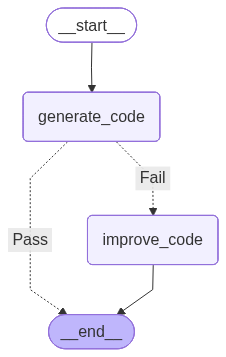

In [42]:
# Build workflow
workflow = StateGraph(State)

# Add nodes
workflow.add_node("generate_code", generate_code)
workflow.add_node("improve_code", improve_code)
# workflow.add_node("polish_joke", polish_code)

# Add edges to connect nodes
workflow.add_edge(START, "generate_code")
workflow.add_conditional_edges("generate_code",peer_review,{"Fail":"improve_code","Pass":END})
# workflow.add_edge("improve_joke", "polish_joke")
workflow.add_edge("improve_code", END)

# Compile
chain = workflow.compile()

# Show workflow
display(Image(chain.get_graph().draw_mermaid_png()))



In [43]:
# Invoke
state = chain.invoke({"topic": "Give me a python code to get the factorial of 8"})

In [44]:
state

{'topic': 'Give me a python code to get the factorial of 8',
 'code': '```python\ndef factorial(n):\n  """\n  This function calculates the factorial of a non-negative integer.\n\n  Args:\n      n: A non-negative integer.\n\n  Returns:\n      The factorial of n.\n  """\n  if n == 0:\n    return 1\n  else:\n    return n * factorial(n-1)\n\n# Calculate the factorial of 8\nresult = factorial(8)\n\n# Print the result\nprint("The factorial of 8 is:", result)\n```\n\n**Explanation:**\n\n1. **Function Definition:**\n   - `def factorial(n):` defines a function named `factorial` that takes an integer `n` as input.\n\n2. **Base Case:**\n   - `if n == 0:` checks if `n` is 0. If it is, the function returns 1 because the factorial of 0 is 1.\n\n3. **Recursive Case:**\n   - `else: return n * factorial(n-1)`: If `n` is not 0, the function returns the product of `n` and the factorial of `n-1`. This is the recursive step, where the function calls itself with a smaller value of `n`.\n\n4. **Function Call